In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib notebook

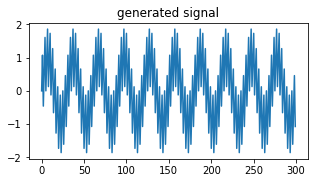

In [2]:
def sine_generator(fs, sinefreq, duration):
    T = duration
    nsamples = fs * T
    w = 2. * np.pi * sinefreq
    t_sine = np.linspace(0, T, nsamples, endpoint=False)
    y_sine = np.sin(w * t_sine)
    result = pd.DataFrame({ 
        'data' : y_sine} ,index=t_sine)
    return result

fps = 30
sine_fq = 10 #Hz
duration = 10 #seconds
sine_5Hz = sine_generator(fps,sine_fq,duration)
sine_fq = 1 #Hz
duration = 10 #seconds
sine_1Hz = sine_generator(fps,sine_fq,duration)

sine = sine_5Hz + sine_1Hz
xaxis = list(range(len(sine)))

plt.figure(figsize=(5,2.5))
plt.title('generated signal')
plt.plot(xaxis,sine)
plt.show()

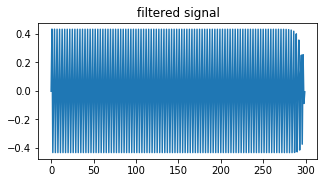

In [3]:
def butter_highpass(cutoff, fps, order=5):
    nyq = 0.5 * fps
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fps, order=5):
    b, a = butter_highpass(cutoff, fps, order=order)
    y = signal.filtfilt(b, a, data)
    return y


filtered_sine = butter_highpass_filter(sine.data,10,fps)

plt.figure(figsize=(5,2.5))
plt.title('filtered signal')
plt.plot(xaxis,filtered_sine)
plt.show()